# Creating a single layer neural network

We first need a dataset to iterate over. Let's use the happiness survey from UC Irvine

In [1]:
# import the required libraries, including pandas to read the csv
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import os

read the csv into memory

In [2]:
data = pd.read_csv("./SomervilleHappinessSurvey2015.csv")

In [4]:
# seperate the target from the input features
# the target is stored in the first column apparently
df = pd.DataFrame(data)
features = torch.tensor(df.iloc[:,1:].values).float()
target = torch.tensor(df.iloc[:,:1].values).float()
print(features.shape) # 6 is our input features for the model
print(target.shape)   # 1 is our output_features for the model


torch.Size([143, 6])
torch.Size([143, 1])


define the architecture of the model, and store in a variable named model

remember to create a single-layer model

In [62]:
# where sigmoid() is the activation function that gets applied to each iteration
model = nn.Sequential(nn.Linear(6,1), nn.Sigmoid())

In [63]:
# Mean Squared Error function (https://en.wikipedia.org/wiki/Mean_squared_error)
loss_funct = nn.MSELoss()

In [64]:
opt = optim.Adam(model.parameters(), lr=0.01)

In [65]:
losses = []
for i in range(100):
    # make prediction based on input features
    y_pred = model(features)
    # compare difference between prediction and target
    loss = loss_funct(y_pred, target)
    # track losses
    losses.append(loss.item())
    # zero out gradients so we don't cloud our data
    opt.zero_grad()
    # track gradients
    loss.backward()
    # optimize input parameters for next iteration
    opt.step()
    if i%10 == 0:
        print(loss)

tensor(0.4127, grad_fn=<MseLossBackward0>)
tensor(0.2677, grad_fn=<MseLossBackward0>)
tensor(0.2740, grad_fn=<MseLossBackward0>)
tensor(0.2664, grad_fn=<MseLossBackward0>)
tensor(0.2607, grad_fn=<MseLossBackward0>)
tensor(0.2584, grad_fn=<MseLossBackward0>)
tensor(0.2561, grad_fn=<MseLossBackward0>)
tensor(0.2539, grad_fn=<MseLossBackward0>)
tensor(0.2518, grad_fn=<MseLossBackward0>)
tensor(0.2500, grad_fn=<MseLossBackward0>)


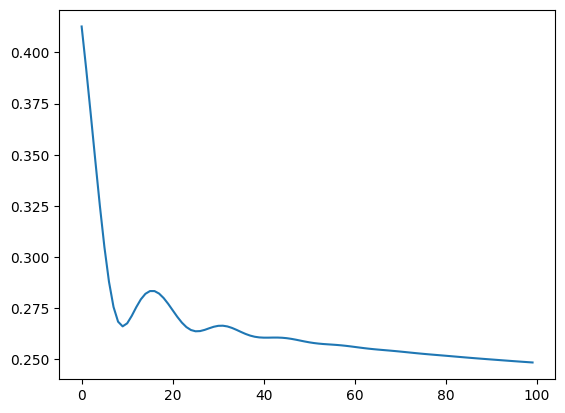

In [66]:
plt.plot(range(0,100), losses)
plt.show()